In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import inspect

# CARATTERISTICHE DATASET

Importo il dataset di riferimento

In [2]:
sr=pd.read_csv("master.csv")

In [156]:
sr.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [3]:
sr

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
sr.shape

(27820, 12)

# PULIZIA DATASET E GESTIONE DATI MANCANTI

In [5]:
sr["sex"]=sr["sex"].replace({"male":"M","female":"F"})
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Dopo aver analizzato il dataset, "GDP FOR Year" viene trasformato in un float

In [6]:
sr[" gdp_for_year ($) "]=sr[" gdp_for_year ($) "].str.replace(",","")
sr[" gdp_for_year ($) "]=sr[" gdp_for_year ($) "]. astype (float)



In [7]:
sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  float64
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


Adesso si cerca di capire come gestire i dati mancanti

In [158]:
sr.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

L'unica variabile che presenta valori mancanti è 'HDI for year' che presenta un alto numero di valori mancanti


In [9]:
#Rappresento su un grafico la variabile con valori mancanti 
print("Numero dei valori mancanti di HDI for year:",sr["HDI for year"].isna().sum()-sr["HDI for year"].count())
print("Quota sul totale delle osservazioni:",round((sr["HDI for year"].isna().sum()-sr["HDI for year"].count())/sr.shape[0],3))



Numero dei valori mancanti di HDI for year: 11092
Quota sul totale delle osservazioni: 0.399


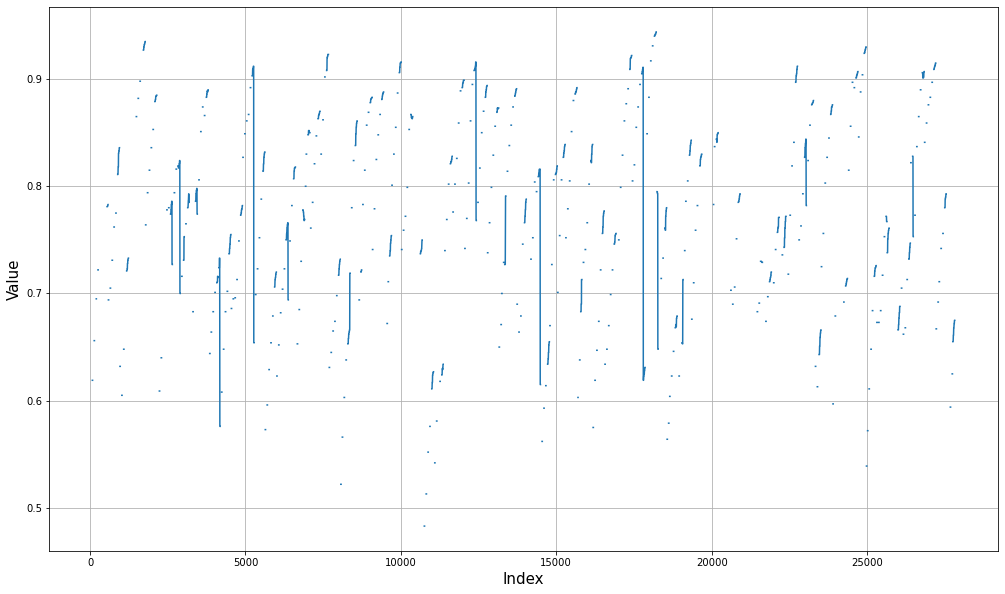

In [10]:
plt.figure(figsize=(17, 10))
plt.plot(sr["HDI for year"][sr["sex"]=="M"])
plt.xlabel('Index', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.grid(True)

Il 39.9% dei dati della variabile "HDI for year" sono dati mancanti

Il grafico , quasi incomprensibile, è chiaramente fortemente condizionato dai valori NULL. Prima di adottare una strategia per cercare di gestire i valori mancanti, si cercano le relazioni, se presenti, tra le variabili.

HDI è un indice riguardante lo sviluppo umano per analizzare la qualità della vita del paese preso in considerazione.
Potrebbe avere delle relazioni con il GDP 

year                  0.366786
suicides_no           0.151399
population            0.102943
suicides/100k pop     0.074279
HDI for year          1.000000
 gdp_for_year ($)     0.305193
gdp_per_capita ($)    0.771228
Name: HDI for year, dtype: float64


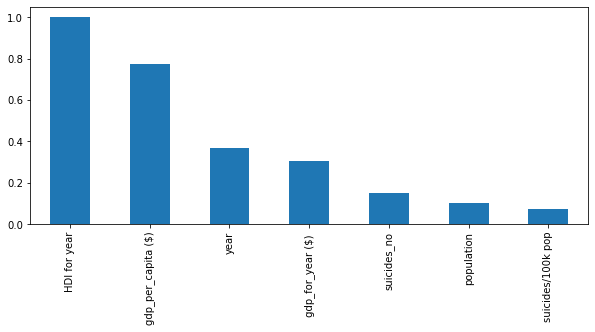

In [11]:
#Analizzo la correlazione tra HDI for year e le altre variabili
plt.figure(figsize=(10,4))
sr.corr()["HDI for year"].sort_values(ascending = False).plot(kind='bar')
print(sr.corr()["HDI for year"])

Da una prima analisi della correlazione si nota come ci sia forte correlazione tra l'indice e il GDP (=PIL) pro-Capite e l'indice "HDI for year".

In [12]:
#Cerco di analizzare i valori medi dei dati mancanti
group=sr.groupby("country").agg({"HDI for year":['median','max','min']})
group

HDI for year              
                           median    max    min
country                                        
Albania                    0.6755  0.722  0.619
Antigua and Barbuda        0.7810  0.783  0.781
Argentina                  0.7930  0.836  0.694
Armenia                    0.7220  0.733  0.605
Aruba                         NaN    NaN    NaN
...                           ...    ...    ...
United Arab Emirates       0.8250  0.828  0.822
United Kingdom             0.8955  0.907  0.753
United States              0.9030  0.915  0.841
Uruguay                    0.7560  0.793  0.667
Uzbekistan                 0.6610  0.675  0.594

[101 rows x 3 columns]

In [13]:
#Elimina le città con valori null in tutti gli anni.
group.isna()
group=group.dropna()


In [14]:
gruppo=sr.groupby(["year","country"]).agg({"HDI for year":'median'})
gb=gruppo
gruppo

HDI for year
year country                          
1985 Antigua and Barbuda           NaN
     Argentina                   0.694
     Australia                     NaN
     Austria                     0.764
     Bahamas                       NaN
...                                ...
2016 Netherlands                   NaN
     Qatar                         NaN
     Romania                       NaN
     Sweden                        NaN
     Thailand                      NaN

[2321 rows x 1 columns]

L'idea a questo punto è quella di voler provare a sfruttare il dataset, da costruire partendo dal groupby, per poter aggregare per paese, cercando una relazione
con la variabile GDP dell'altro dataset e quindi riuscendo a sostituire gli NA.
Dato l'alto numero di valori mancanti, considerata la correlazione presente con una variabile di cui si conoscono tutti i dati, non è necessario riempire i valori Null in quanto la procedura potrebbe essere piuttosto complessa e non necessariamente valida, si preferisce quindi continuare senza considerare questa caratteristica


# ANALISI SUL NUMERO DEI SUICIDI

Analizzo la correlazione tra nSuicidi e le altre variabili.
In questo caso il numero dei suicidi è in generale, non ne considera quindi il paese in cui sono avvenuti nè il periodo preciso


year                 -0.004546
suicides_no           1.000000
population            0.616162
suicides/100k pop     0.306604
HDI for year          0.151399
 gdp_for_year ($)     0.430096
gdp_per_capita ($)    0.061330
Name: suicides_no, dtype: float64


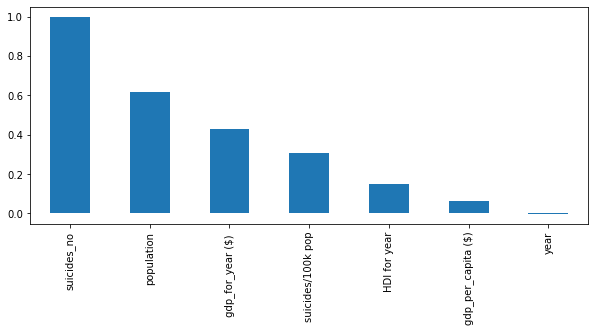

In [17]:

plt.figure(figsize=(10,4))
sr.corr()["suicides_no"].sort_values(ascending = False).plot(kind='bar')
print(sr.corr()["suicides_no"])

Il numero di suicidi, da una prima analisi esplorativa, risultano essere correlati con la popolazione e il "gdp_for_years"

# APPROFONDIMENTO SUI SUICIDI AGGREGATI PER COUNTRY

A questo punto dell'analisi, dopo aver visto in modo molto superficiale possibili relazioni tra il numero di suicidi e le altre variabili, si vuole analizzare le relazioni tra le caratteristiche, considerando i valori medi del periodo, aggregati per paese 

In [18]:
sCountry=sr.groupby("country")[' gdp_for_year ($) ','gdp_per_capita ($)','suicides/100k pop','suicides_no'].mean()

sCountry

<ipython-input-18-e4bc1b522eff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sCountry=sr.groupby("country")[' gdp_for_year ($) ','gdp_per_capita ($)','suicides/100k pop','suicides_no'].mean()


,gdp_for_year ($),gdp_per_capita ($),suicides/100k pop,suicides_no
country,,,,
Albania,5.211661e+09,1859.045455,3.502879,7.462121
Antigua and Barbuda,8.035452e+08,10448.185185,0.552901,0.033951
Argentina,2.742565e+11,7914.096774,10.469328,221.018817
Armenia,5.386592e+09,1873.919463,3.275872,6.392617
Aruba,2.196223e+09,24221.642857,9.503095,0.601190
...,...,...,...,...
United Arab Emirates,2.532432e+11,42162.000000,1.317917,8.638889
United Kingdom,1.816067e+12,31908.354839,7.502473,367.755376
United States,1.051071e+13,39269.612903,13.819812,2779.604839


Dal groupby costruisco il dataset, seguendo una procedura che poi verrà replicata, seppur con altre variabili, successivamente

In [19]:
gruppoSuicidi=sr.groupby("year").agg({"suicides_no":'sum'})
gruppoSuicidi
annoS=[]
nS=[]
for row in gruppoSuicidi.T.iteritems():
    
    annoS.append(row[0])
    nS.append(row[1][0])

In [20]:
countryS=[]
gdpforyear=[]
gdpcapite=[]
suicides100k=[]
suicedesn=[]
for row in sCountry.T.iteritems():
    countryS.append(row[0])
    gdpforyear.append(row[1][0])
    gdpcapite.append(row[1][1])
    suicides100k.append(row[1][2])
    suicedesn.append(row[1][3])
    
    #print(row[0])   #row[0] mi prende country
    #print(row[1][0])#row[1][0] mi prende gdp for year
    #print(row[1][3])#row[1][1] mi prende gdp_pro_capite
                    #row[1][2] mi prende suicides100k/ab
                    #row[1][3] mi prende suicides_no
   #Sono tutte medie ricordare!!!



In [21]:
#Creo il dataframe con i valori presi dal groupby
suicidi=pd.Series(nS)
annoS=pd.Series(annoS)

countrySer=pd.Series(countryS)
gdpforyearSer=pd.Series(gdpforyear)
gdpcapiteSer=pd.Series(gdpcapite)
suicides100kSer=pd.Series(suicides100k)
suicedesnSer=pd.Series(suicedesn)

dfMean=pd.DataFrame({'nSuicidi':suicedesnSer,'Country':countrySer,'gdpforyear':gdpforyearSer,'gdpcapite':gdpcapiteSer,'suicides100k':suicides100k})#,index=annoS)
dfMean


,nSuicidi,Country,gdpforyear,gdpcapite,suicides100k
0,7.462121,Albania,5.211661e+09,1859.045455,3.502879
1,0.033951,Antigua and Barbuda,8.035452e+08,10448.185185,0.552901
2,221.018817,Argentina,2.742565e+11,7914.096774,10.469328
3,6.392617,Armenia,5.386592e+09,1873.919463,3.275872
4,0.601190,Aruba,2.196223e+09,24221.642857,9.503095
...,...,...,...,...,...
96,8.638889,United Arab Emirates,2.532432e+11,42162.000000,1.317917
97,367.755376,United Kingdom,1.816067e+12,31908.354839,7.502473
98,2779.604839,United States,1.051071e+13,39269.612903,13.819812
99,39.101190,Uruguay,2.337827e+10,7622.071429,19.461190


Al dataset aggiungo la somma di suicidi avvenuti nel periodo , aggregati per paese

In [22]:
sommasuicidi=sr.groupby("country")['suicides_no'].sum()
sommaSuicidi=[]
for row in sommasuicidi.T.iteritems():
    sommaSuicidi.append(row[1])
dfMean["SommasuicidPerCountry"]=sommaSuicidi
dfMean

,nSuicidi,Country,gdpforyear,gdpcapite,suicides100k,SommasuicidPerCountry
0,7.462121,Albania,5.211661e+09,1859.045455,3.502879,1970
1,0.033951,Antigua and Barbuda,8.035452e+08,10448.185185,0.552901,11
2,221.018817,Argentina,2.742565e+11,7914.096774,10.469328,82219
3,6.392617,Armenia,5.386592e+09,1873.919463,3.275872,1905
4,0.601190,Aruba,2.196223e+09,24221.642857,9.503095,101
...,...,...,...,...,...,...
96,8.638889,United Arab Emirates,2.532432e+11,42162.000000,1.317917,622
97,367.755376,United Kingdom,1.816067e+12,31908.354839,7.502473,136805
98,2779.604839,United States,1.051071e+13,39269.612903,13.819812,1034013
99,39.101190,Uruguay,2.337827e+10,7622.071429,19.461190,13138


nSuicidi                 0.995625
gdpforyear               0.737398
gdpcapite                0.115485
suicides100k             0.322874
SommasuicidPerCountry    1.000000
Name: SommasuicidPerCountry, dtype: float64


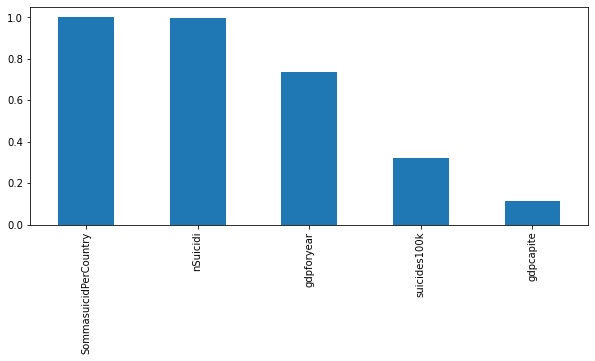

In [23]:
plt.figure(figsize=(10,4))
dfMean.corr()["SommasuicidPerCountry"].sort_values(ascending = False).plot(kind='bar')
print(dfMean.corr()["SommasuicidPerCountry"])

La somma del numero di suicidi per paese in cui sono stati segnalati è ,ovviamente, correlata con il numero di suicidi medio aggregato per paese, ma anche con il "gdp_for_year" medio aggregato per paese. Il livello di correlazione è pari a 0.73 , un risultato interessante che da indicazioni di come queste variabili possono essere effettivamente legate. A questo punto si cerca di analizzare anche le serie storiche per vedere se, trasformazioni stazionarie o comunque senza l'influenza di tendenze , mostrano relazioni più forti con il numero di suicidi avvenuti

# ANALISI SULLE SERIE STORICHE 

In questa sezione vengono costruite le serie storiche della somma dei suicidi totali anno per anno, dell'andamento del GDP medio e dell'andamento dell'indice medio dei suicidi ogni 100k/ab.
Di queste serie storiche vengono poi costruite le serie del tasso di variazione e delle differenze prime. Infine, vengono analizzate le relazioni.

Text(0, 0.5, 'Numero suicidi')

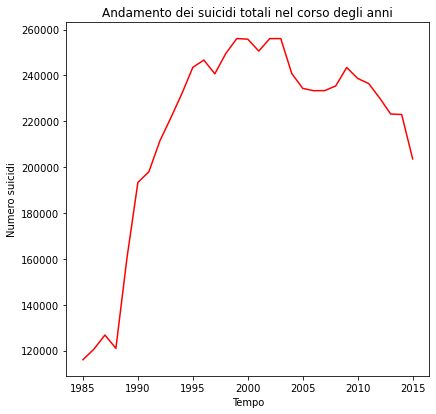

In [24]:
#Raggruppo i suicidi in valore assoluto totali e cerco di analizzare la serie storica


#Creo il dataframe con i valori presi dal groupby
suicidi=pd.Series(nS)
annoS=pd.Series(annoS)
df_S=pd.DataFrame({'nSuicidi':suicidi,'annoS':annoS})#,index=annoS)
df_S.index = df_S['annoS']

#Tolgo la variabile che non voglio, dato che l'ho utilizzata come 'index'
df_S2=df_S.copy()
df_S2=df_S2.drop('annoS',axis=1)

#Grafico della serie storica del dataframe costruito
plt.figure(figsize=(6.5, 6.5))

df_S2['nSuicidi'][:len(df_S2)-1].plot(color='r')
plt.title('Andamento dei suicidi totali nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('Numero suicidi')

Nel grafico precedente ho eliminato il 2016 in quanto, probabilmente non avendo a disposizione tutti i dati, bruscamente scendeva ad un valore molto basso

Text(0, 0.5, 'Variazione suicidi')

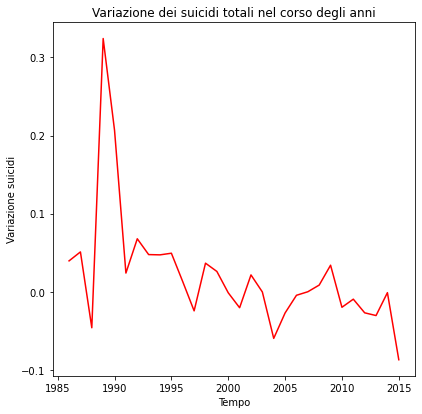

In [25]:
#CREAZIONE DEL TASSO DI VARIAZIONE PER I NUMERI DI SUICIDI

#Creo il dataframe con i valori presi dal groupby
listaVariazione=[]
for i in range(len(nS)-1):
    listaVariazione.append((nS[i+1]-nS[i])/nS[i])


variazioneSuicidi=pd.Series(listaVariazione)
annoSuicidi=pd.Series((annoS)[1:].reset_index(drop=True))
df_V=pd.DataFrame({'Variazione_Suicidi':variazioneSuicidi,'anno':annoSuicidi})#,index=annoS)

df_V.index = df_V['anno']
df_V=df_V.drop('anno',axis=1)


#Grafico della serie storica delle variazioni del dataframe costruito
plt.figure(figsize=(6.5, 6.5))
df_V['Variazione_Suicidi'][:len(df_V)-1].plot(color='r')
plt.title('Variazione dei suicidi totali nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('Variazione suicidi')


Analizzando il tasso di variazione, il picco più alto viene raggiunto nel 1989, dopo di che la serie sembra seguire un andamento oscillante intorno lo zero, fino al 2015, anno in cui tocca il suo minimo storico , almeno nel dataset preso in considerazione

Text(0, 0.5, 'Differenza suicidi')

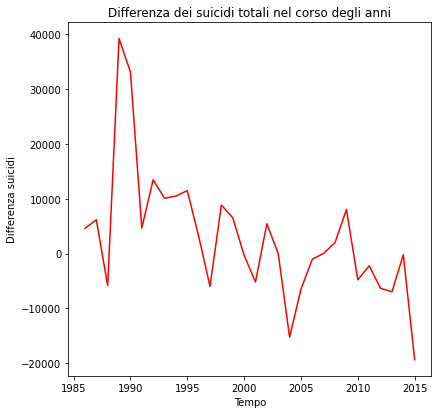

In [26]:
#POSSO PROVARE ALLE DIFFERENZE 
#CREAZIONE DEL NUMERO DI SUICIDI ALLE DIFFERENZE 
listaDiffsuicidi=[]
for i in range(len(nS)-1):
    listaDiffsuicidi.append(nS[i+1]-nS[i])


DiffSuicidi=pd.Series(listaDiffsuicidi)
#annoSuicidi=pd.Series((annoS)[1:].reset_index(drop=True))
df_Diff=pd.DataFrame({'Diff_Suicidi':DiffSuicidi,'anno':annoSuicidi})#,index=annoS)

df_Diff.index = df_Diff['anno']
df_Diff=df_Diff.drop('anno',axis=1)


#Grafico della serie storica delle variazioni del dataframe costruito
plt.figure(figsize=(6.5, 6.5))
df_Diff['Diff_Suicidi'][:len(df_Diff)-1].plot(color='r')
plt.title('Differenza dei suicidi totali nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('Differenza suicidi')


Andamento simile alla variazione del numero di suicidi

Text(0, 0.5, 'GDP annuo medio')

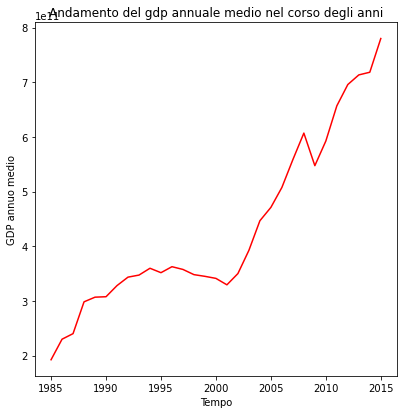

In [27]:
#Analizzo la serie storica dei gdp, anno per anno faccio una media dei gdp 
gdpMean=sr.groupby("year").agg({" gdp_for_year ($) ":'mean'})
annoGdp=[]
GdpMean=[]
for row in gdpMean.T.iteritems():
    
    annoGdp.append(row[0])
    GdpMean.append(row[1][0])
    

#Creo il dataframe con i valori presi dal groupby
gdpmedio=pd.Series(GdpMean)
annogdp=pd.Series(annoGdp)
df_gdp=pd.DataFrame({'Gdp_medio':gdpmedio,'anno':annogdp})#,index=annoS)
df_gdp.index = df_gdp['anno']

#Tolgo la variabile che non voglio, dato che l'ho utilizzata come 'index'
df_gdp=df_gdp.drop('anno',axis=1)

#Grafico della serie storica del dataframe costruito
plt.figure(figsize=(6.5, 6.5))

df_gdp['Gdp_medio'][:len(df_gdp)-1].plot(color='r')
plt.title('Andamento del gdp annuale medio nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('GDP annuo medio')

La tendenza del gpd annuo medio risulta crescente per quasi tutto il periodo. Soprattutto a partire dagli anni 2000, dove c'è stata una piccola inversione di tendenza solamente nel 2008, anno della crisi globale

Text(0, 0.5, 'Variazione gdp medio')

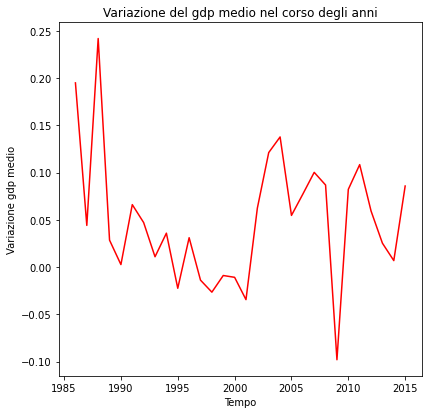

In [28]:
#CREAZIONE DEL TASSO DI VARIAZIONE PER IL GDP MEDIO 

#Creo il dataframe con i valori presi dal groupby
listaVariazioneGDP=[]
for i in range(len(GdpMean)-1):
    listaVariazioneGDP.append((GdpMean[i+1]-GdpMean[i])/GdpMean[i])


variazioneGDP=pd.Series(listaVariazioneGDP)
annoGDP=pd.Series((annoS)[1:].reset_index(drop=True))
df_GDP_V=pd.DataFrame({'Variazione_GDP_medio':variazioneGDP,'anno':annoGDP})#,index=annoS)


df_GDP_V.index = df_GDP_V['anno']
df_GDP_V=df_GDP_V.drop('anno',axis=1)



#Grafico della serie storica delle variazioni del dataframe costruito
plt.figure(figsize=(6.5, 6.5))
df_GDP_V['Variazione_GDP_medio'][:len(df_GDP_V)-1].plot(color='r')
plt.title('Variazione del gdp medio nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('Variazione gdp medio')

La variazione del GDP medio nel corso degli anni presenta una forte variabilità. Tra il 1985 e il 1990 ha raggiunto il picco positivo, diminuendo successivamente e tornando in una fase di crescita consistente soltanto nei primi anni 2000. Chiaramente, il picco negativo è stato raggiunto nel 2008


Text(0, 0.5, 'gdp medio alle differenze')

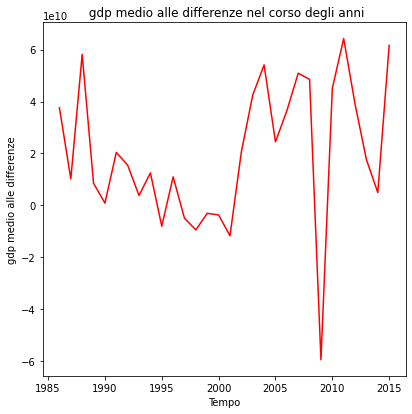

In [29]:
#POSSO PROVARE ALLE DIFFERENZE 
#CREAZIONE DEL GDP MEDIO ALLE DIFFERENZE 

#Creo il dataframe con i valori presi dal groupby
listaDiffGDP=[]
for i in range(len(GdpMean)-1):
    listaDiffGDP.append(GdpMean[i+1]-GdpMean[i])


DiffGDP=pd.Series(listaDiffGDP)
#annoGDP=pd.Series((annoS)[1:].reset_index(drop=True))
df_GDP_Diff=pd.DataFrame({'Diff_GDP_medio':DiffGDP,'anno':annoGDP})#,index=annoS)
df_GDP_Diff
df_GDP_Diff.index = df_GDP_Diff['anno']
df_GDP_Diff=df_GDP_Diff.drop('anno',axis=1)
df_GDP_Diff



#Grafico della serie storica delle variazioni del dataframe costruito
plt.figure(figsize=(6.5, 6.5))
df_GDP_Diff['Diff_GDP_medio'][:len(df_GDP_Diff)-1].plot(color='r')
plt.title(' gdp medio alle differenze nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('gdp medio alle differenze')

Simile al caso della variazione del GDP

Text(0, 0.5, 'Numero suicidi 100k/ab')

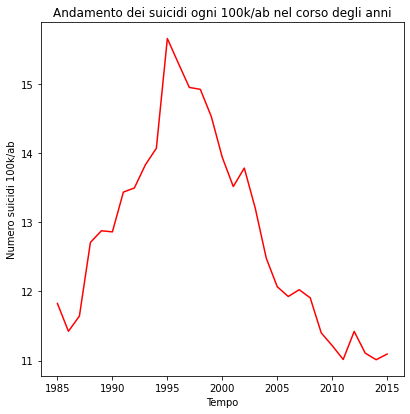

In [30]:
#SERIE STORICA DEL n suicidi 100K/AB

gruppoS100=sr.groupby("year").agg({"suicides/100k pop":'mean'})
gruppoSuicidi
annoS100=[]
nS100=[]
for row in gruppoS100.T.iteritems():
    
    annoS100.append(row[0])
    nS100.append(row[1][0])

    

#Creo il dataframe con i valori presi dal groupby
suicidi100=pd.Series(nS100)
annoS100=pd.Series(annoS100)
df_S100=pd.DataFrame({'mediaSuicidi100k/ab':suicidi100,'anno':annoS100})#,index=annoS)
df_S100.index = df_S100['anno']

#Tolgo la variabile che non voglio, dato che l'ho utilizzata come 'index'
df_S100=df_S100.drop('anno',axis=1)

#Grafico della serie storica del dataframe costruito
plt.figure(figsize=(6.5, 6.5))




df_S100['mediaSuicidi100k/ab'][:len(df_S100)-1].plot(color='r')
plt.title('Andamento dei suicidi ogni 100k/ab nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('Numero suicidi 100k/ab')

L'andamento della media dei suicidi ogni 100 mila abitanti è stato crescente fino al 1995, per poi descrescere , alternando solo piccole oscillazioni, fino al 2011, anno in cui ha toccato il minimo storico

Text(0, 0.5, 'Variazione suicidi media 100k/ab')

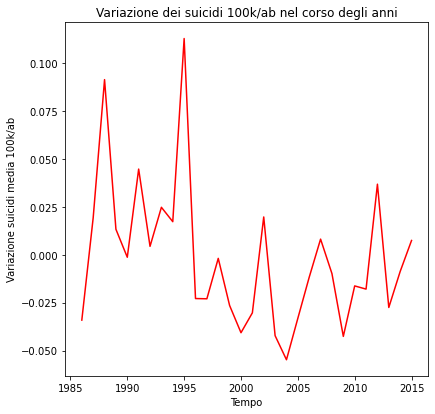

In [31]:
listaVariazione100=[]
for i in range(len(nS100)-1):
    listaVariazione100.append((nS100[i+1]-nS100[i])/nS100[i])


variazioneSuicidi100=pd.Series(listaVariazione100)
annoSuicidi=pd.Series((annoS)[1:].reset_index(drop=True))
df_V100=pd.DataFrame({'Variazione_Suicidi':variazioneSuicidi100,'anno':annoSuicidi})#,index=annoS)

df_V100.index = df_V100['anno']
df_V100=df_V100.drop('anno',axis=1)




#Grafico della serie storica delle variazioni del dataframe costruito
plt.figure(figsize=(6.5, 6.5))
df_V100['Variazione_Suicidi'][:len(df_V100)-1].plot(color='r')
plt.title('Variazione dei suicidi 100k/ab nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('Variazione suicidi media 100k/ab')

La variazione dell'indice dei suicidi ogni 100k/abitanti segue un andamento del tutto variabile, con forti variazioni positive e negative, arrivando fino al 2015 quando il valori si avvicina allo zero

Text(0, 0.5, 'Differenza suicidi media 100k/ab')

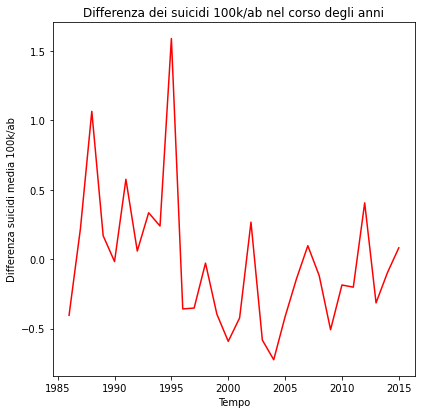

In [32]:


listaDiff100=[]
for i in range(len(nS100)-1):
    listaDiff100.append(nS100[i+1]-nS100[i])


listaDiff100=pd.Series(listaDiff100)
annoSuicidi=pd.Series((annoS)[1:].reset_index(drop=True))
df_D100=pd.DataFrame({'Differenza_Suicidi_100k/ab':listaDiff100,'anno':annoSuicidi})#,index=annoS)

df_D100.index = df_D100['anno']
df_D100=df_D100.drop('anno',axis=1)





#Grafico della serie storica delle variazioni del dataframe costruito
plt.figure(figsize=(6.5, 6.5))
df_D100['Differenza_Suicidi_100k/ab'][:len(df_D100)-1].plot(color='r')
plt.title('Differenza dei suicidi 100k/ab nel corso degli anni')
plt.xlabel('Tempo')
plt.ylabel('Differenza suicidi media 100k/ab')

Diff_GDP_medio          1.000000
Diff_suicidi_100k/ab   -0.625826
Diff_Suicidi            0.885170
Name: Diff_GDP_medio, dtype: float64


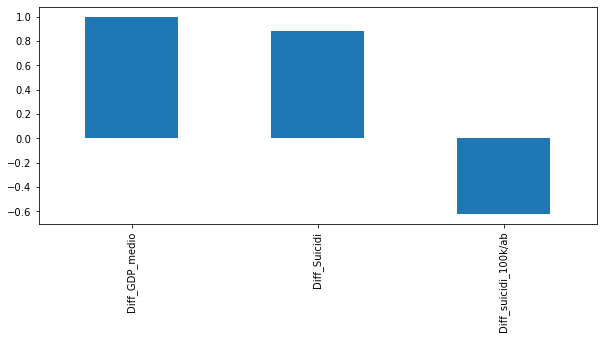

In [33]:
#Costruisco un dataframe di tutte queste serie storiche cercando poi di analizzarne la correlazione
df_GDP_Diff["Diff_suicidi_100k/ab"]=df_D100['Differenza_Suicidi_100k/ab']
df_GDP_Diff["Diff_Suicidi"]=df_Diff['Diff_Suicidi']
plt.figure(figsize=(10,4))
df_GDP_Diff.corr()['Diff_GDP_medio'].sort_values(ascending = False).plot(kind='bar')
print(df_GDP_Diff.corr()['Diff_GDP_medio'])

Variazione_GDP_medio          1.000000
Variazione_Suicidi_100k/ab   -0.606671
Variazione_Suicidi            0.782347
Name: Variazione_GDP_medio, dtype: float64


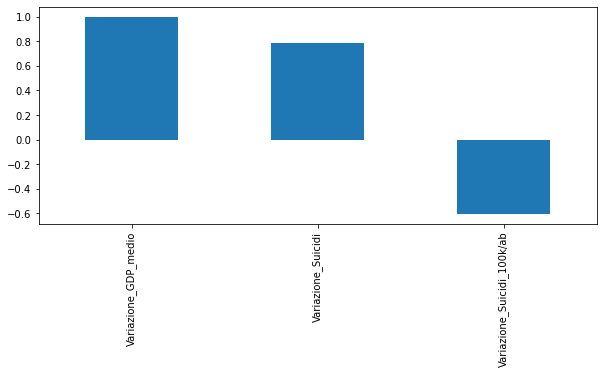

In [105]:
df_GDP_V["Variazione_Suicidi_100k/ab"]=df_V100['Variazione_Suicidi']
df_GDP_V["Variazione_Suicidi"]=df_V['Variazione_Suicidi']
plt.figure(figsize=(10,4))
df_GDP_V.corr()['Variazione_GDP_medio'].sort_values(ascending = False).plot(kind='bar')
print(df_GDP_V.corr()['Variazione_GDP_medio'])


La correlazione tra la differenza prima della media annuale gdp è pari allo 0.88 rispetto la differenza prima del numero totale dei suicidi, mentre è pari a -0.63 rispetto la differenza prima dell'indice medio del numero dei suicidi ogni 100k/ab. Quindi da una parte all'aumento del gdp medio annuale, mi aspetto un aumento del numero di suicidi rispetto all'anno passato ma ad una diminuizione dell'indice medio che riguarda il numero di suicidi ogni 100k/ab. Simili, seppur con risultati leggermente diversi, sono le considerazioni per quanto riguarda il tasso di variazione.  

Possibile ipotesi proviene dal fatto che l'aumento del numero di suicidi non necessariamente comporta un aumento del valore medio dell'indice che riguarda il numero di suicidi ogni 100k/abitanti. Infatti questo indice , come vedremo in seguito, risulta essere mediamente più alto per i paesi con un GDP inferiore la media globale, mentre i paesi che mediamente presentano il maggior numero di suicidi sono quelli con valore GDP superiore la media.

_______________________________________________________________________________________________________________________________

# RELAZIONI TRA SUICIDI 100K/AB E ALTRE VARIABILI

ADESSO CERCO DI VISUALIZZARE POSSIBILI RELAZIONI TRA GRUPPI DI ETA' E NUMERO DI SUICIDI PER 100K/AB

In [35]:
#Gruppi di età e numeri di suicidi 

In [36]:
np.unique(sr['age'].values)

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

             suicides/100k pop
age                           
15-24 years           8.947154
25-34 years          12.186885
35-54 years          14.947441
5-14 years            0.620041
55-74 years          16.155579
75+ years            23.955409


<AxesSubplot:xlabel='age', ylabel='suicides/100k pop'>

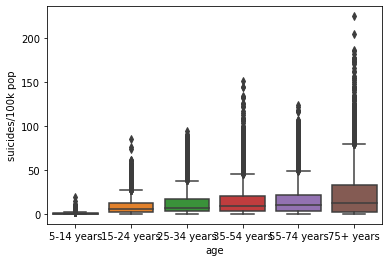

In [37]:
#BOXPLOT

import seaborn as sns

order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
print(sr.groupby("age").agg({"suicides/100k pop":'mean'}))
sns.boxplot(x="age", y="suicides/100k pop", data=sr, order=order)


Nel boxplot del numero di suicidi per 100k abitanti diviso in fasce di età, si può vedere come la fascia di età più colpita
è 75+. In generale all'aumentare della fascia di età, mediamente c'è un aumento del numero dei suicidi per 100 k abitanti.
Sono comunque molti gli outlier, soprrutto per la fascia 75+ , ma anche la fascia 35-54 sembra raggiungere degli alti valori per la variabile considerata

-------------------------------------------------------------------------------------------------------------------------------

Vengono visualizzate possibili relazione tra generazioni e numero di suicidi per 100k/abitanti 

In [38]:
np.unique(sr['generation'].values)

array(['Boomers', 'G.I. Generation', 'Generation X', 'Generation Z',
       'Millenials', 'Silent'], dtype=object)

                 suicides/100k pop
generation                        
Boomers                  14.742094
G.I. Generation          23.946378
Generation X             10.556874
Generation Z              0.642299
Millenials                5.383597
Silent                   18.418848


<AxesSubplot:xlabel='generation', ylabel='suicides/100k pop'>

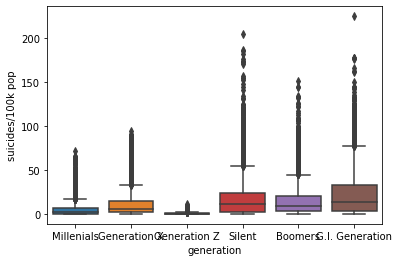

In [39]:
#Boxplot generazione suicidi per 100k/ab
order = ['Millenials', 'Generation X', 'Generation Z', 'Silent', 'Boomers', 'G.I. Generation']
print(sr.groupby("generation").agg({"suicides/100k pop":'mean'}))
sns.boxplot(x="generation", y="suicides/100k pop", data=sr, order=order)

Segue il boxplot delle fasce di età

# ESPLORAZIONE GDP_FOR_YEARS

In [40]:
dfMean.sort_values(by=['gdpforyear'], ascending = False, inplace = True)


Vengono create delle fasce di GDP in base ai quantili di gdp medio. I paesi con valori di GDP medio tra il minimo e il primo quartile vengono assegnati alla 4 fascia, tra il primo e il valore mediano alla terza, tra il valore mediano e il terzo quartile alla seconda fascia e, infine, i paesi con gdp medio superiore il terzo quartile vengono assegnati alla prima fascia
    

In [41]:

lista=[]
for row in dfMean.T.iteritems():
    
    if row[1][2]<=(dfMean.describe()['gdpforyear'][4]):
        lista.append(4)
    elif row[1][2]>(dfMean.describe()['gdpforyear'][4]) and row[1][2]<=(dfMean.describe()['gdpforyear'][5]):
        lista.append(3)
    elif row[1][2]>(dfMean.describe()['gdpforyear'][5]) and row[1][2]<=(dfMean.describe()['gdpforyear'][6]):
        lista.append(2)
    elif row[1][2]>(dfMean.describe()['gdpforyear'][6]):
        lista.append(1)
        
classegdp=pd.Series(lista)
dfMean["Classe_gdp"]=lista
dfMean

,nSuicidi,Country,gdpforyear,gdpcapite,suicides100k,SommasuicidPerCountry,Classe_gdp
98,2779.604839,United States,1.051071e+13,39269.612903,13.819812,1034013,1
46,2169.091398,Japan,4.339221e+12,36397.548387,21.573199,806902,1
35,933.532051,Germany,2.742233e+12,35164.230769,15.559904,291262,1
97,367.755376,United Kingdom,1.816067e+12,31908.354839,7.502473,136805,1
33,914.241667,France,1.781194e+12,31481.466667,21.675694,329127,1
...,...,...,...,...,...,...,...
37,0.122581,Grenada,5.762393e+08,6209.406452,2.132258,38,4
78,0.413333,Saint Vincent and Grenadines,4.884483e+08,4954.640000,5.755433,124,4
76,0.000000,Saint Kitts and Nevis,2.160186e+08,5525.000000,0.000000,0,4
27,0.000000,Dominica,9.858518e+07,1485.000000,0.000000,0,4


In [42]:
dfMean.groupby("Classe_gdp").mean()

,nSuicidi,gdpforyear,gdpcapite,suicides100k,SommasuicidPerCountry
Classe_gdp,,,,,
1,609.962717,1.307521e+12,28358.729042,13.635219,212665.040000
2,132.176715,1.018339e+11,16648.896200,13.610793,42856.800000
3,59.334846,1.831787e+10,10047.832590,14.187609,13181.600000
4,4.269431,2.683614e+09,8936.985405,6.877147,1185.923077


           suicides100k           
                 median       mean
Classe_gdp                        
1             12.992806  13.635219
2             11.337531  13.610793
3             10.541458  14.187609
4              5.430217   6.877147


<AxesSubplot:xlabel='Classe_gdp', ylabel='suicides100k'>

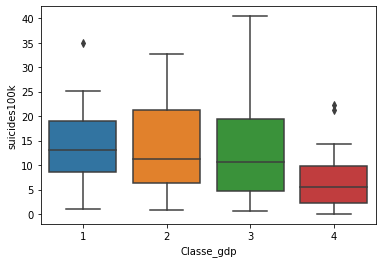

In [43]:
#Ora cerco di analizzare i suicidi per classe di gdp

print(dfMean.groupby("Classe_gdp").agg({"suicides100k":['median','mean']}))
sns.boxplot(x="Classe_gdp", y="suicides100k", data=dfMean)


Qui si può vedere come il livello mediano dei suicidi ogni 100k/ab per i paesi della prima fascia di gdp è più alto di quello delle altre, anche se mediamente sono i paesi della terza fascia ,  probabilmente condizionati da outlier con valori alti, ad avere il valore medio dell'indice di suicidi ogni 100k/ab più alto dei paesi delle altre fasce

           SommasuicidPerCountry                     
                          median           mean count
Classe_gdp                                           
1                       100202.0  212665.040000    25
2                        20660.0   42856.800000    25
3                         6792.0   13181.600000    25
4                          150.5    1185.923077    26


<AxesSubplot:xlabel='Classe_gdp', ylabel='SommasuicidPerCountry'>

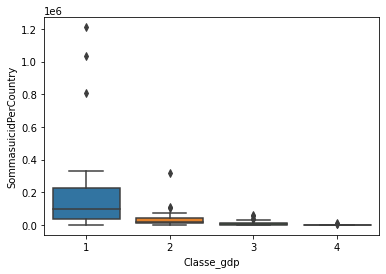

In [44]:
print(dfMean.groupby("Classe_gdp").agg({"SommasuicidPerCountry":['median','mean','count']}))
sns.boxplot(x="Classe_gdp", y="SommasuicidPerCountry", data=dfMean)

Come è stato costruito questo grafico:
E' stato calcolata la media dei vari anni raggruppata per country.
Questo significa che relativa alla riga dell'Argentina, si avranno i valori medi risultanti dagli anni 1985-2016 delle variabili considerate per l'Argentina e cosi via.
Dopodiche è stato ordinato il dataframe così costruito in base al gdp medio e  diviso i paesi in 4 fasce di gdp per vederne delle strutture.

Dal boxplot qui sopra si nota come effettivamente il numero medio e mediano di suicidi  è molto più grande per i paesi appartenenti alla prima fascia , quasi 5 volte superiore al valore medio del numero di suicidi dei paesi appartenente alla seconda fascia, che lo segue in questa speciale classifica


# ANALISI DIFFERENZE TRA GRUPPI GDP

In questa parte dell'analisi si cerca di applicare un test ANOVA ai dati della somma di numero di suicidi per paesi suddivisi in 4 fasce. L'obiettivo del test è quello di capire se le differenze nei loro valori medi siano dovuti al caso, oppure se è dovuta all'appartenenza alle diverse fasce

In [45]:
A=list(dfMean[dfMean["Classe_gdp"]==1]["SommasuicidPerCountry"])
B=list(dfMean[dfMean["Classe_gdp"]==2]["SommasuicidPerCountry"])
C=list(dfMean[dfMean["Classe_gdp"]==3]["SommasuicidPerCountry"])
D=list(dfMean[dfMean["Classe_gdp"]==4]["SommasuicidPerCountry"])

In [46]:
classeA=pd.Series(A)
classeB=pd.Series(B)
classeC=pd.Series(C)
classeD=pd.Series(D)

dfClassi=pd.DataFrame({'A':classeA,'B':classeB,'C':classeC,'D':classeD})#,index=annoS)
dfClassi=dfClassi[:len(dfClassi)-1]
dfClassi

,A,B,C,D
0,1034013.0,110643.0,24179.0,93
1,806902.0,12368.0,59892.0,1656
2,291262.0,33677.0,1958.0,27
3,136805.0,53080.0,28039.0,3894
4,329127.0,11294.0,36388.0,1905
5,132060.0,24061.0,8149.0,585
6,226613.0,12574.0,13138.0,1970
7,107561.0,10089.0,34803.0,13090
8,1209742.0,43687.0,412.0,177
9,100202.0,21330.0,3483.0,304


In [47]:
df_melt = pd.melt(dfClassi.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'gdp_class', 'value']
df_melt

,index,gdp_class,value
0,0,A,1034013.0
1,1,A,806902.0
2,2,A,291262.0
3,3,A,136805.0
4,4,A,329127.0
...,...,...,...
95,20,D,11.0
96,21,D,38.0
97,22,D,124.0
98,23,D,0.0


C:\Users\s512jf-e\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\s512jf-e\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\s512jf-e\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


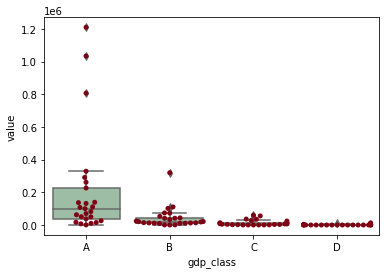

In [48]:
ax = sns.boxplot(x='gdp_class', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="gdp_class", y="value", data=df_melt, color='#7d0013')
plt.show()

In [49]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install bioinfokit
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(gdp_class)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(gdp_class),3.0,7.255553e+11,2.418518e+11,8.970613,0.000027
Residual,96.0,2.588203e+12,2.696045e+10,NaN,NaN


Il valore del p.value è inferiore al livello di significatività, il che significa che il test è statisticamente significativo e le differenze tra i valori delle 4 fasce non sono dovuti dal caso

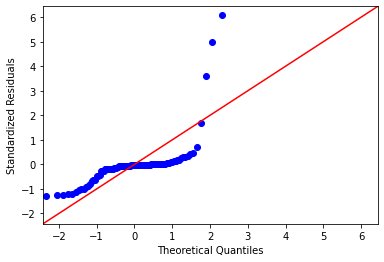

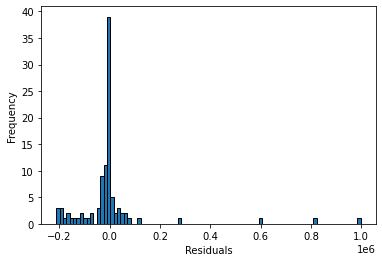

In [51]:
import statsmodels.api as sm

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

L'analisi dei residui, necessaria per poter convalidare il test, mostra sia un' istogramma dei residui che un grafico QQ dei residui standardizzati non ottimale, questo ci indica come, seppur le differenze tra i valori analizzati nel test sembrano essere significative, non è possibile convalidare il test in quanto non rispetta le ipotesi

# ML: RANDOM FOREST

Come primo dataset, sul quale verrà lanciato l'algoritmo di ML, viene costruita una serie storica dove i valori relativi alle caratteristiche sono i valori medi ottenuti aggregando per anno, non considerando quindi le differenze possibili tra i vari paesi.

In [126]:


sr_ts=sr.groupby("year").mean()

#A QUESTO DOPO AGGIUNGO LA SOMMA DEI SUICIDI
annots=[]
popts=[]
s100kts=[]
gdpannots=[]
gdpcapitets=[]


for row in sr_ts.T.iteritems():
    
    annots.append(row[0])
    popts.append(row[1][1])
    s100kts.append(row[1][2])
    gdpannots.append(row[1][4])
    gdpcapitets.append(row[1][5])

In [127]:
suicidi=pd.Series(nS)
annoS=pd.Series(annoS)

annoTS=pd.Series(annots)
popTS=pd.Series(popts)
s100kTS=pd.Series(s100kts)
GDPTS=pd.Series(gdpannots)
GDPCTS=pd.Series(gdpcapitets)


dfTimeSeries=pd.DataFrame({'anno':annoTS,'Popolazione_media':popTS,'Suicidi_medi_100k/ab':s100kTS,'gdp_medio_pro_capite':GDPCTS,'gdp_medio':GDPTS})#,index=anno)#,index=annoS)




In [128]:
#L'anno diventa l'indice del data frame
dfTimeSeries.index = dfTimeSeries['anno']
#Tolgo la variabile che non voglio, dato che l'ho utilizzata come 'index'
dfTimeSeries=dfTimeSeries.drop('anno',axis=1)



A questo punto, vengono aggiunte tutte le trasformazioni considerate nella sezione riguardante le serie storiche delle caratteristiche del dataset

In [129]:
dfTimeSeries=dfTimeSeries[1:]

In [130]:
#Aggiungo le differenze, i tassi di variazione ecc
df_GDP_V['Variazione_GDP_medio']
df_V['Variazione_Suicidi']
df_Diff['Diff_Suicidi']
df_GDP_Diff['Diff_GDP_medio']
df_V100['Variazione_Suicidi']
df_D100['Differenza_Suicidi_100k/ab']
df_S2['nSuicidi'] #Somma suicidi

dfTimeSeries["Somma_numero_suicidi"]=df_S2['nSuicidi']
dfTimeSeries["TassoVariazione_GDP_Medio"]=df_GDP_V['Variazione_GDP_medio']
dfTimeSeries["TassoVariazione_suicidi"]=df_V['Variazione_Suicidi']
dfTimeSeries["Differenza_prima_suicidi"]=df_Diff['Diff_Suicidi']
dfTimeSeries["Differenza_prima_GDP_Medio"]=df_GDP_Diff['Diff_GDP_medio']
dfTimeSeries["TassoVariazione_suicidi_100k/ab"]=df_V100['Variazione_Suicidi']
dfTimeSeries["Differenza_prima_100k/ab"]=df_D100['Differenza_Suicidi_100k/ab']



Tolgo la riga relativa al 2016, per provare a testare l'algoritmo senza una riga anomala, probabilmente condizionata dalla mancanza di informazioni.

In [141]:
dfTimeSeries
dfTimeSeries2=dfTimeSeries.copy()
#dfTimeSeries2=dfTimeSeries2[:len(dfTimeSeries2)-1]

Il secondo dataset che viene costruito, riguarda solamente le serie storiche dei valori medi della popolazione, dell'indice dei suicidi ogni 100k/ab e del GDP annuale medio e pro capite medio. Non vengono quindi considerate le trasformazioni ottenute nella sezione delle serie storiche. In generale, il dataset viene costruito seguendo passaggi analoghi a quelli effettuati per costruire il primo dataset.

In [132]:
dfTimeSeriesprova=pd.DataFrame({'anno':annoTS,'Popolazione_media':popTS,'Suicidi_medi_100k/ab':s100kTS,'gdp_medio_pro_capite':GDPCTS,'gdp_medio':GDPTS})#,index=anno)#,index=annoS)
dfTimeSeriesprova.index = dfTimeSeriesprova['anno']
#Tolgo la variabile che non voglio, dato che l'ho utilizzata come 'index'
dfTimeSeriesprova=dfTimeSeriesprova.drop('anno',axis=1)
dfTimeSeriesprova=dfTimeSeriesprova[1:]

Il terzo dataset è molto simile al primo, con la differenza che non ci sono indicazioni sulle variazioni dei numeri di suicidi. In definitiva, il primo dataset è forse poco indicativo per lo scopo che stiamo ricercando, in quanto possiede già le indicazioni su come potrebbe essere la variabile target


In [133]:
dfTimeSeriesFinale=dfTimeSeriesprova.copy()

In [134]:
dfTimeSeriesFinale["Differenza_prima_GDP_Medio"]=df_GDP_Diff['Diff_GDP_medio']
dfTimeSeriesFinale["Differenza_prima_100k/ab"]=df_D100['Differenza_Suicidi_100k/ab']
dfTimeSeriesFinale["TassoVariazione_GDP_Medio"]=df_GDP_V['Variazione_GDP_medio']
dfTimeSeriesFinale["TassoVariazione_suicidi_100k/ab"]=df_V100['Variazione_Suicidi']
dfTimeSeriesFinale["TassoVariazione_GDP_Medio"]=df_GDP_V['Variazione_GDP_medio']
dfTimeSeriesFinale["TassoVariazione_suicidi"]=df_V['Variazione_Suicidi']


I dataset sui quali viene applicato l'algoritmo di ML sono:
    
    -serie storica con il valore medio sui gdp e sulla popolazione, con l'aggiunta dell'indice ogni 100k/ab e                         le serie trasformate calcolate nella sezione delle serie storiche
    
    -Popolazione media, suicidi ogni 100k/ab medi e gdp medio
    
    -Popolazione media e valori di gdp (nessun indicatore sui suicidi)
    
     La variabile target è la somma del numero di suicidi medi registrati nell'anno

# RandomForestRegressor con il primo dataset

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

Dopo aver importato i moduli, indichiamo con labels i valori da predirre in tutti gli algoritmi che verranno applicati in questa fase

In [142]:
# Labels are the values we want to predict
labels = np.array(dfTimeSeries2['Somma_numero_suicidi'])


In [143]:


Xtrain, Xtest, ytrain, ytest = train_test_split(dfTimeSeries2, labels, random_state=42)
model = RandomForestRegressor(n_estimators = 5000, random_state = 42)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#print(ypred,ytest)

errors = abs(ypred - ytest)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.49 %.


In [68]:
print(ypred,ytest)

[244439.9112 236851.327  222726.9324 242549.9486 244747.0182 240184.288
 222133.0838 247190.214 ] [240861 232063 203640 243544 234375 233361 230160 256079]


# RandomForestRegressor con il secondo dataset

In [145]:


Xtrain, Xtest, ytrain, ytest = train_test_split(dfTimeSeriesprova, labels, random_state=42)
model = RandomForestRegressor(n_estimators=1000,random_state=42)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)


errors = abs(ypred - ytest)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.84 %.


In [70]:
print(ypred,ytest)

[222984 255832 233408 256095 240745 246725 222984 236484] [223199 250652 243487 256079 232063 243544 203640 238702]


# RandomForestRegressor con il terzo dataset

In [146]:

#from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(dfTimeSeriesFinale, labels, random_state=42)
model = RandomForestRegressor(n_estimators=1000,random_state=42)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#print(ypred,ytest)

errors = abs(ypred - ytest)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.97 %.


In [72]:
print(ypred,ytest)

[222984 249591 249591 255832 221565 249591 236484 236484] [223199 250652 243487 256079 232063 243544 203640 238702]


# Applicazione dell'algoritmo su Popolazione e GDP

Come ultima applicazione nelle serie storiche, si cerca di predirre la somma del numero di suicidi, avendo la conoscenza della popolazione media relativa agli individui cui è stato registrato il suicidio, e le caratteristiche riguardandi il GDP medio,le sue trasformate, e il GDP medio pro-capite

In [148]:
dfTimeSeriesFinale2=dfTimeSeriesFinale.copy()
dfTimeSeriesFinale2=dfTimeSeriesFinale2.drop('Suicidi_medi_100k/ab',axis=1)
dfTimeSeriesFinale2=dfTimeSeriesFinale2.drop('TassoVariazione_suicidi_100k/ab',axis=1)
dfTimeSeriesFinale2=dfTimeSeriesFinale2.drop('TassoVariazione_suicidi',axis=1)
dfTimeSeriesFinale2=dfTimeSeriesFinale2.drop('Differenza_prima_100k/ab',axis=1)

In [150]:
#REGRESSIONE


Xtrain, Xtest, ytrain, ytest = train_test_split(dfTimeSeriesFinale2, labels, random_state=42)
model = RandomForestRegressor(n_estimators=5000,random_state=42)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#print(ypred,ytest)

errors = abs(ypred - ytest)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 96.02 %.


In [80]:
print(ypred,ytest)

[222984 249591 249591 256095 246725 249591 236484 235447] [223199 250652 243487 256079 232063 243544 203640 238702]


Dopo l'applicazione dell'algoritmo sui dati presi in considerazione, si può affermare come , soltanto avendo a disposizione il valore medio globale annuale della popolazione media per le fasce di età in cui sono stati registrati i suicidi e i valori medi del gdp  e alcune sue trasformate, si può prevedere con un accuracy pari al 96.02% la somma del numero di suicidi accaduti nell'anno

# RandomForestRegressor SUL DATASET DEI PAESI

Infine, si applica l'algoritmo di ML ad un dataset differente dai precedenti. L'obiettivo di questa sezione, infatti, è stato quello di aggregare il dataset di partenza per anno e per paese, avendo quindi i valori medi relativi ai vari paesi per ogni anno.

Infatti i dataset precedenti erano poco corposi per addestrare un algoritmo ed ottenere dei buoni risultati anche per gli anni a venire. In definitiva, si può considerare come un esercizio di stile mentre nella prossima analisi si cerca di rispondere alla domanda finale, sulla quale è stata portata avanti l'intera analisi. La domanda a cui si cerca di rispondere è la seguente: con quanta accuratezza si può predirre il numero totale di suicidi in un anno , conoscendo il paese, la popolazione media relativa a quella parte di popolazione che in un anno ha commesso un suicidio, e le  caratteristiche socio-economiche come l'indice medio del numero di suicidi su 100 mila abitanti e come il GDP annuale medio e pro-capite medio?

In [81]:
 dfMean

,nSuicidi,Country,gdpforyear,gdpcapite,suicides100k,SommasuicidPerCountry,Classe_gdp
98,2779.604839,United States,1.051071e+13,39269.612903,13.819812,1034013,1
46,2169.091398,Japan,4.339221e+12,36397.548387,21.573199,806902,1
35,933.532051,Germany,2.742233e+12,35164.230769,15.559904,291262,1
97,367.755376,United Kingdom,1.816067e+12,31908.354839,7.502473,136805,1
33,914.241667,France,1.781194e+12,31481.466667,21.675694,329127,1
...,...,...,...,...,...,...,...
37,0.122581,Grenada,5.762393e+08,6209.406452,2.132258,38,4
78,0.413333,Saint Vincent and Grenadines,4.884483e+08,4954.640000,5.755433,124,4
76,0.000000,Saint Kitts and Nevis,2.160186e+08,5525.000000,0.000000,0,4
27,0.000000,Dominica,9.858518e+07,1485.000000,0.000000,0,4


In [82]:
dfMeanClass=dfMean.copy()

In [83]:
#dfMeanClass=dfMeanClass.drop('suicides100k',axis=1)
dfMeanClass=dfMeanClass.drop('SommasuicidPerCountry',axis=1)
dfMeanClass=dfMeanClass.drop('nSuicidi',axis=1)
#labels_dfMeanClass = np.array(dfMean['SommasuicidPerCountry'])

L'aggregazione attraverso un groupby , permette di aggregare per anno e, per ogni anno, di aggregare per paese

In [85]:
sommaSuicidesCountry=sr.groupby(["year","country"]).agg({'suicides_no':'sum'})

In [86]:
sommaSuicidesCountry

suicides_no
year country                         
1985 Antigua and Barbuda            0
     Argentina                   1988
     Australia                   1861
     Austria                     2091
     Bahamas                        1
...                               ...
2016 Netherlands                 1886
     Qatar                         68
     Romania                     1953
     Sweden                      1130
     Thailand                    4117

[2321 rows x 1 columns]

In [87]:
df_year=sr.groupby(["year","country"]).mean()


In [88]:
df_year

suicides_no    population  suicides/100k pop  \
year country                                                             
1985 Antigua and Barbuda     0.000000  5.214500e+03           0.000000   
     Argentina             165.666667  2.257567e+06          11.205833   
     Australia             155.083333  1.213542e+06          13.617500   
     Austria               174.250000  5.925096e+05          32.067500   
     Bahamas                 0.083333  1.697500e+04           0.396667   
...                               ...           ...                ...   
2016 Netherlands           188.600000  1.423955e+06          12.739000   
     Qatar                   6.800000  2.213121e+05           1.643000   
     Romania               195.300000  1.664490e+06          11.633000   
     Sweden                113.000000  8.125852e+05          13.884000   
     Thailand              411.700000  5.344200e+06           7.732000   

                          HDI for year   gdp_for_year ($)   gdp_per_capita ($)  
year country                                                                    
1985 Antigua and Barbuda           NaN        2.409239e+08              3850.0  
     Argentina                   0.694        8.841667e+10              3264.0  
     Australia                     NaN        1.801910e+11             12374.0  
     Austria                     0.764        6.938677e+10              9759.0  
     Bahamas                       NaN        2.320700e+09             11393.0  
...                                ...                 ...                 ...  
2016 Netherlands                   NaN        7.772275e+11             48108.0  
     Qatar                         NaN        1.524519e+11             62484.0  
     Romania                       NaN        1.878059e+11             10020.0  
     Sweden                        NaN        5.144600e+11             55594.0  
     Thailand                      NaN        4.117552e+11              6713.0  

[2321 rows x 6 columns]

Dal groupby viene poi costruito il dataset su cui lavorare

In [89]:
anno=[]
paese=[]
suicides_no=[]
population=[]
suicides100k=[]
gdpyear=[]
gdpcapita=[]
#3 lo salto
for row in df_year.T.iteritems():
    anno.append(row[0][0])#anno
    paese.append(row[0][1])#paese
    suicides_no.append(row[1][0])
    population.append(row[1][1])
    suicides100k.append(row[1][2])
    gdpyear.append(row[1][4])
    gdpcapita.append(row[1][5])

In [90]:
SommaSuicidi=[]
for row in sommaSuicidesCountry.T.iteritems():
    SommaSuicidi.append(row[1][0])

In [91]:
annoDF=pd.Series(anno)
paeseDF=pd.Series(paese)
suicides_noDF=pd.Series(suicides_no)
populationDF=pd.Series(population)
suicides100kDF=pd.Series(suicides100k)
gdpyearDF=pd.Series(gdpyear)
gdpcapitaDF=pd.Series(gdpcapita)
SommaSuicidiDF=pd.Series(SommaSuicidi)


dfCountry_year=pd.DataFrame({'anno':annoDF,'Paese':paeseDF,'Somma_Suicidi':SommaSuicidiDF,'Suicidi_medi':suicides_noDF,'Pop_media':populationDF,'Suicidi_100k/ab_medi':suicides100kDF,'GDP_for_years':gdpyearDF,'GDP_pro_capita':gdpcapitaDF})#,index=anno)#,index=annoS)
dfCountry_year



,anno,Paese,Somma_Suicidi,Suicidi_medi,Pop_media,Suicidi_100k/ab_medi,GDP_for_years,GDP_pro_capita
0,1985,Antigua and Barbuda,0,0.000000,5.214500e+03,0.000000,2.409239e+08,3850.0
1,1985,Argentina,1988,165.666667,2.257567e+06,11.205833,8.841667e+10,3264.0
2,1985,Australia,1861,155.083333,1.213542e+06,13.617500,1.801910e+11,12374.0
3,1985,Austria,2091,174.250000,5.925096e+05,32.067500,6.938677e+10,9759.0
4,1985,Bahamas,1,0.083333,1.697500e+04,0.396667,2.320700e+09,11393.0
...,...,...,...,...,...,...,...,...
2316,2016,Netherlands,1886,188.600000,1.423955e+06,12.739000,7.772275e+11,48108.0
2317,2016,Qatar,68,6.800000,2.213121e+05,1.643000,1.524519e+11,62484.0
2318,2016,Romania,1953,195.300000,1.664490e+06,11.633000,1.878059e+11,10020.0
2319,2016,Sweden,1130,113.000000,8.125852e+05,13.884000,5.144600e+11,55594.0


Non essendo possibile lavorare all'algoritmo di ML dando loro le etichette originali costituite dal loro nome, la caratteristica dei paesi viene quindi disaggregata attraverso l'utilizzo di variabili dummy 

In [92]:
Dummies_Country=pd.get_dummies(dfCountry_year['Paese'])

Le variabili dummy vengono concatenate al dataset iniziale, al quale poi verrà eliminata la caratteristica originale di "Paese" e imposto come indice l'anno

In [93]:
dfCountry_year=pd.concat([Dummies_Country, dfCountry_year], axis=1)

In [94]:
dfCountry_year

,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Uruguay,Uzbekistan,anno,Paese,Somma_Suicidi,Suicidi_medi,Pop_media,Suicidi_100k/ab_medi,GDP_for_years,GDP_pro_capita
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1985,Antigua and Barbuda,0,0.000000,5.214500e+03,0.000000,2.409239e+08,3850.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1985,Argentina,1988,165.666667,2.257567e+06,11.205833,8.841667e+10,3264.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1985,Australia,1861,155.083333,1.213542e+06,13.617500,1.801910e+11,12374.0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1985,Austria,2091,174.250000,5.925096e+05,32.067500,6.938677e+10,9759.0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1985,Bahamas,1,0.083333,1.697500e+04,0.396667,2.320700e+09,11393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,0,0,0,0,0,0,0,0,0,0,...,0,0,2016,Netherlands,1886,188.600000,1.423955e+06,12.739000,7.772275e+11,48108.0
2317,0,0,0,0,0,0,0,0,0,0,...,0,0,2016,Qatar,68,6.800000,2.213121e+05,1.643000,1.524519e+11,62484.0
2318,0,0,0,0,0,0,0,0,0,0,...,0,0,2016,Romania,1953,195.300000,1.664490e+06,11.633000,1.878059e+11,10020.0
2319,0,0,0,0,0,0,0,0,0,0,...,0,0,2016,Sweden,1130,113.000000,8.125852e+05,13.884000,5.144600e+11,55594.0


In [95]:

dfCountry_year.index = dfCountry_year['anno']

#Tolgo la variabile che non voglio, dato che l'ho utilizzata come 'index'
dfCountry_year=dfCountry_year.drop('anno',axis=1)
dfCountry_year

,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,United States,Uruguay,Uzbekistan,Paese,Somma_Suicidi,Suicidi_medi,Pop_media,Suicidi_100k/ab_medi,GDP_for_years,GDP_pro_capita
anno,,,,,,,,,,,,,,,,,,,,,
1985,0,1,0,0,0,0,0,0,0,0,...,0,0,0,Antigua and Barbuda,0,0.000000,5.214500e+03,0.000000,2.409239e+08,3850.0
1985,0,0,1,0,0,0,0,0,0,0,...,0,0,0,Argentina,1988,165.666667,2.257567e+06,11.205833,8.841667e+10,3264.0
1985,0,0,0,0,0,1,0,0,0,0,...,0,0,0,Australia,1861,155.083333,1.213542e+06,13.617500,1.801910e+11,12374.0
1985,0,0,0,0,0,0,1,0,0,0,...,0,0,0,Austria,2091,174.250000,5.925096e+05,32.067500,6.938677e+10,9759.0
1985,0,0,0,0,0,0,0,0,1,0,...,0,0,0,Bahamas,1,0.083333,1.697500e+04,0.396667,2.320700e+09,11393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Netherlands,1886,188.600000,1.423955e+06,12.739000,7.772275e+11,48108.0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Qatar,68,6.800000,2.213121e+05,1.643000,1.524519e+11,62484.0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,Romania,1953,195.300000,1.664490e+06,11.633000,1.878059e+11,10020.0


In [96]:
dfCountry_year=dfCountry_year.drop('Paese',axis=1)
dfCountry_year

,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,United Kingdom,United States,Uruguay,Uzbekistan,Somma_Suicidi,Suicidi_medi,Pop_media,Suicidi_100k/ab_medi,GDP_for_years,GDP_pro_capita
anno,,,,,,,,,,,,,,,,,,,,,
1985,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,5.214500e+03,0.000000,2.409239e+08,3850.0
1985,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1988,165.666667,2.257567e+06,11.205833,8.841667e+10,3264.0
1985,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1861,155.083333,1.213542e+06,13.617500,1.801910e+11,12374.0
1985,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2091,174.250000,5.925096e+05,32.067500,6.938677e+10,9759.0
1985,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.083333,1.697500e+04,0.396667,2.320700e+09,11393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1886,188.600000,1.423955e+06,12.739000,7.772275e+11,48108.0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,68,6.800000,2.213121e+05,1.643000,1.524519e+11,62484.0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1953,195.300000,1.664490e+06,11.633000,1.878059e+11,10020.0


Qui viene salvata quella che poi costituirà la variabile target dell'algoritmo, ossia la somma dei suicidi per paese, avvenuti anno per anno

In [97]:
# Use numpy to convert to arrays
#import numpy as np
# Labels are the values we want to predict
labels2 = np.array(dfCountry_year['Somma_Suicidi'])
# Remove the labels from the features
# axis 1 refers to the columns


dfCountry_year= dfCountry_year.drop('Somma_Suicidi', axis = 1)


# Saving feature names for later use
#eature_list = list(dfTimeSeries2.columns)
# Convert to numpy array
#dfTimeSeries2 = np.array(dfTimeSeries2)

In [98]:
dfCountry_year2=dfCountry_year.copy()
dfCountry_year2=dfCountry_year2.drop('Suicidi_medi', axis = 1)

In [99]:
dfCountry_year2

,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Pop_media,Suicidi_100k/ab_medi,GDP_for_years,GDP_pro_capita
anno,,,,,,,,,,,,,,,,,,,,,
1985,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5.214500e+03,0.000000,2.409239e+08,3850.0
1985,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.257567e+06,11.205833,8.841667e+10,3264.0
1985,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1.213542e+06,13.617500,1.801910e+11,12374.0
1985,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,5.925096e+05,32.067500,6.938677e+10,9759.0
1985,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1.697500e+04,0.396667,2.320700e+09,11393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.423955e+06,12.739000,7.772275e+11,48108.0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.213121e+05,1.643000,1.524519e+11,62484.0
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.664490e+06,11.633000,1.878059e+11,10020.0


Viene infine applicato l'algoritmo di ML sul dataset costruito

In [100]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dfCountry_year2, labels2, random_state=42)
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
#print(ypred,ytest)

errors = abs((ypred+1) - (ytest+1))
mape = 100 * (errors / (ytest+1))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

errors = abs((ypred+1) - (ytest+1))
mape = 100 * (errors / (ytest+1))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

Accuracy: 90.69 %.


In [104]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dfCountry_year2, labels2, random_state=42)
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.71 %.


Anche aumentando il parametro n_estimator il risultato è stabile, è sufficiente quindi settare n_estimator ad un valore pari a 1000.

Con un livello di Accuracy pari al 90.69% è possibile prevedere la somma di suicidi avvenuti in un anno, dato il paese preso in input e le sue caratteristiche socio-economiche 